# Expanding confusion

- supervised by Prof. Cheng Zhao

## References:

1. Davis & Lineweaver: *Expanding Confusion: common misconceptions of cosmological horizons and the superluminal expansion of the Universe*, 2003, https://arxiv.org/abs/astro-ph/0310808v2

## from time to scale factor

## H(z)

In [1]:
import numpy as np
from astropy import cosmology
from astropy.cosmology import LambdaCDM
from matplotlib import pyplot as plt

In [26]:
from astropy import units as u

In [2]:
from scipy import integrate

In [8]:
def dt_over_da(a, H0, a0, OmR, OmM, OmL, OmK):
    sq = H0 * a0 * np.sqrt(OmR /a**(2) + OmM / a + OmL *a**2 + OmK)
    return 1/sq

In [46]:
a1_l = np.arange(0.01, 1, 0.01)
t_l = []

In [29]:
Mpc_over_km = 3.08567758 * 10**19
Myr_over_s = 365.25*24*3600 * 10**6

In [47]:
for a1 in a1_l:
    t = integrate.quad(lambda a: dt_over_da(a, 70/Mpc_over_km*Myr_over_s, 1, 0, 0.3, 0.7, 0), 0, a1)
    t_l.append(t[0])
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


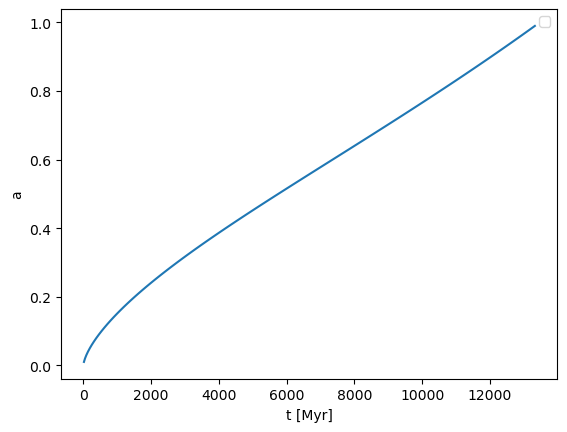

In [48]:
plt.plot(t_l, a1_l)
plt.xlabel("t [Myr]")
plt.ylabel("a")
plt.legend()

In [2]:
z = np.arange(0, 1000, 1)

In [6]:
cosmology.H(LambdaCDM, z)

AttributeError: module 'astropy.cosmology' has no attribute 'H'

$$E(a) = \sqrt{ \Omega_R \left(\frac{a}{a_0}\right)^{-4} + \Omega_M \left(\frac{a}{a_0}\right)^{-3} + \Omega_\Lambda + \Omega_K \left(\frac{a}{a_0}\right)^{-2} }$$

In [19]:
cosmology.Om(0)

TypeError: Om() missing 1 required positional argument: 'z'

In [21]:
H0 = 70
Om =0.3
Ol = 0.7
Hz = H0 * np.sqrt(Om * (1+z)**3 + Ol)

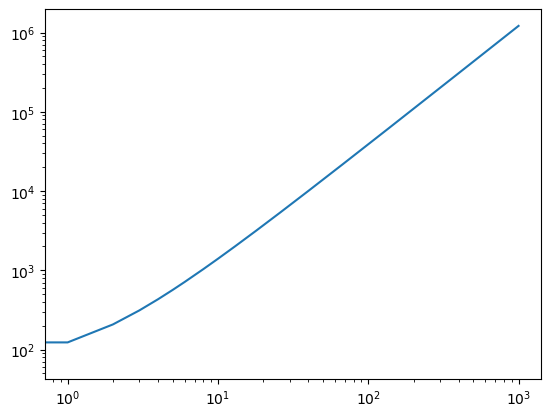

In [24]:
plt.plot(z, Hz)
plt.xscale("log")
plt.yscale("log")

In [20]:
import colossus